In [1]:
# Import Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset

USAHousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# To find the information about the dataset

USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USAHousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


### A. Data Preprocessing

##### 1. Missing Value Treatment

In [6]:
USAHousing.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

In [7]:
USAHousing.isnull().sum()/len(USAHousing)*100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

In [8]:
# Since the less than 25% data is missing, imputation method shall be follwed

# Except Address all other variables are numerical, so check for the outliers and then decide the imputation method (mean / median)

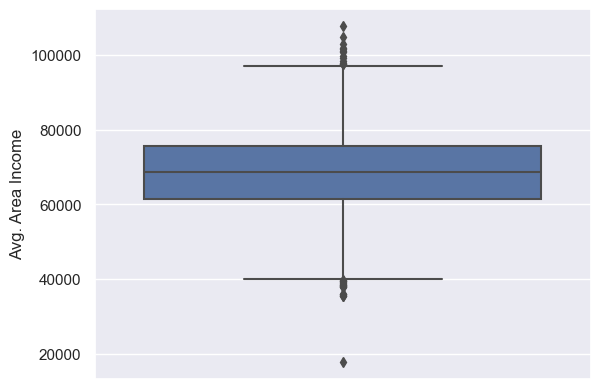

In [9]:
sns.boxplot(y = 'Avg. Area Income', data = USAHousing)
plt.show()

# Outliers are present, So have to go with median method

In [10]:
USAHousing['Avg. Area Income'] = USAHousing['Avg. Area Income'].fillna(USAHousing['Avg. Area Income'].median())

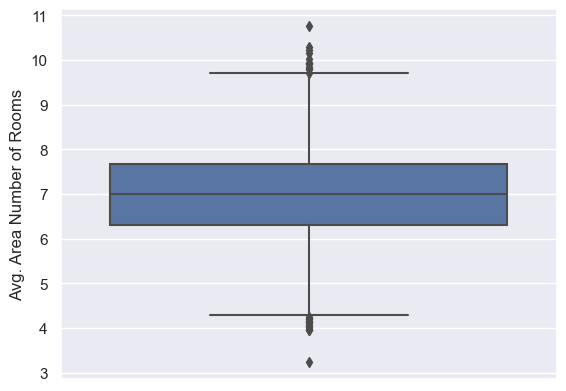

In [11]:
sns.boxplot(y = 'Avg. Area Number of Rooms', data = USAHousing)
plt.show()

#Outliers are present but not too far away from the range

In [12]:
USAHousing['Avg. Area Number of Rooms'] = USAHousing['Avg. Area Number of Rooms'].fillna(USAHousing['Avg. Area Number of Rooms'].median())

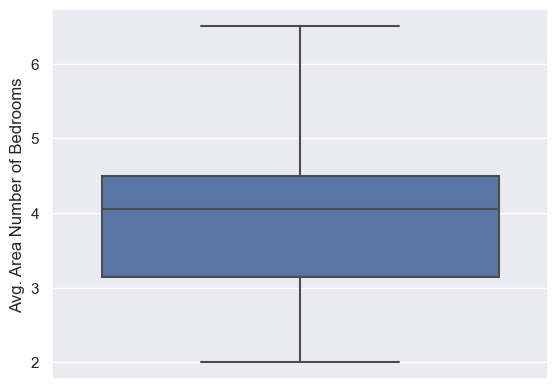

In [13]:
sns.boxplot(y = 'Avg. Area Number of Bedrooms', data = USAHousing)
plt.show()

# No outliers present, so have to use mean method

In [14]:
USAHousing['Avg. Area Number of Bedrooms'] = USAHousing['Avg. Area Number of Bedrooms'].fillna(USAHousing['Avg. Area Number of Bedrooms'].mean())

In [15]:
USAHousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [16]:
# All the missing values are filled

##### 2. Encoding Concept

In [17]:
USAHousing.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [18]:
USAHousing['Address'].nunique()

5000

In [19]:
# Only character variable is Address, However, it is not a significant variable to predict the price
# Also, all the variables are unique.
# So encoding concept cannot be applied and drop the variable

In [20]:
# Dropping the Address column
USAHousing = USAHousing.iloc[:,:-1]

In [21]:
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


##### 3. Handling the Outliers

In [22]:
# It is manadatory to handle the outliers to solve the regression problem

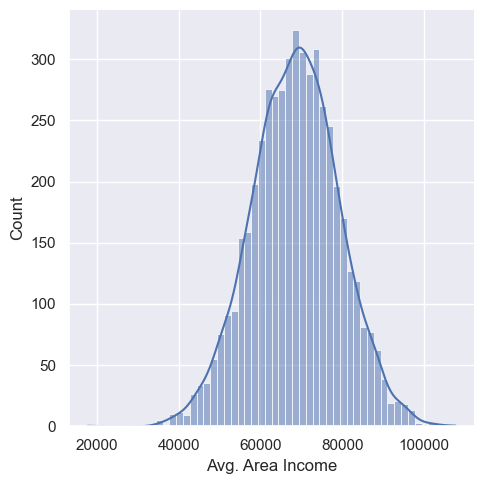

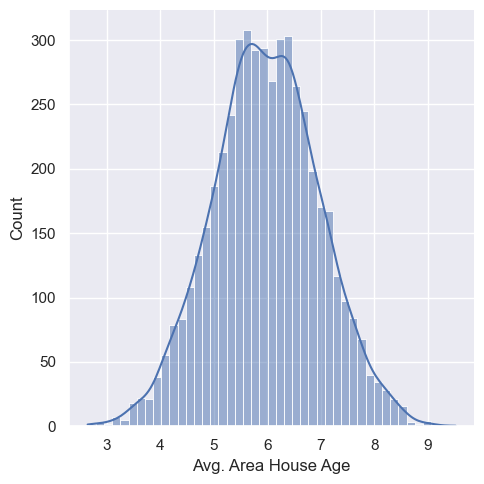

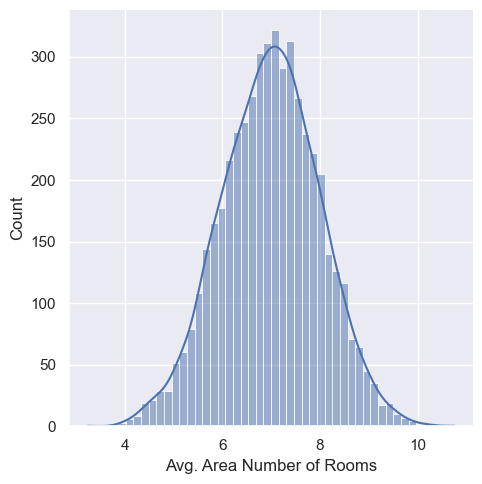

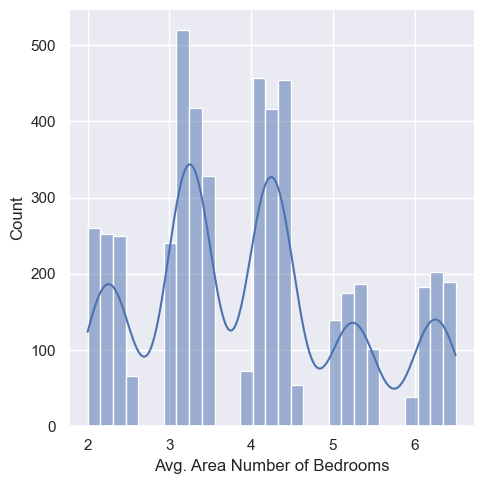

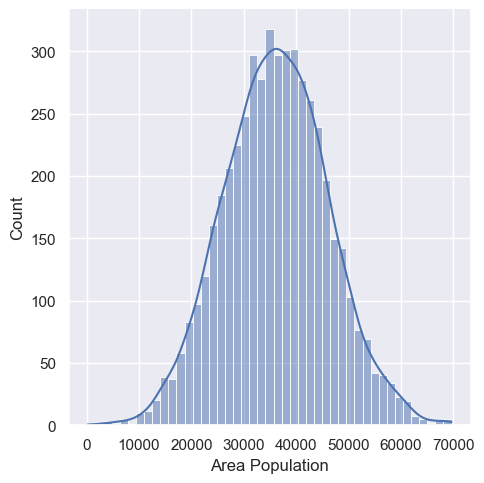

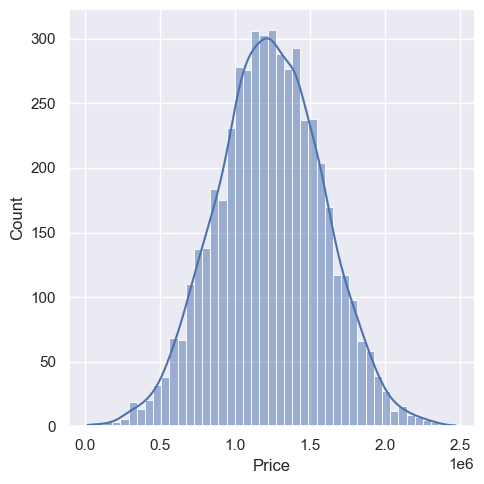

In [172]:
def distplots(col):
    sns.displot(USAHousing[col], kde=True)
    plt.show()
    
for i in list(USAHousing.columns)[0:]:
    distplots(i)

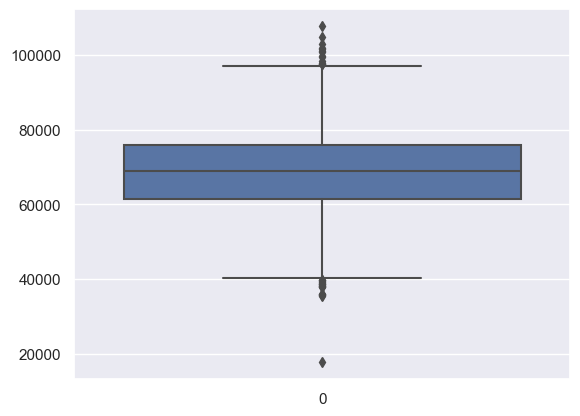

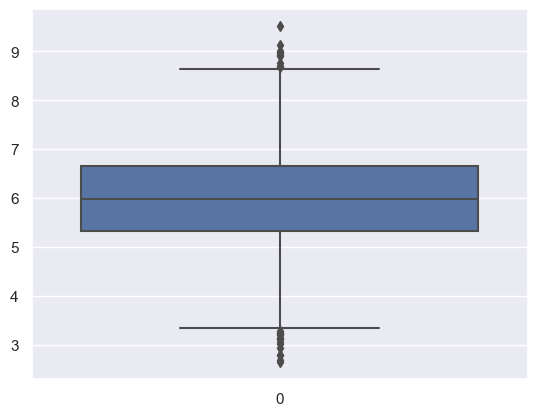

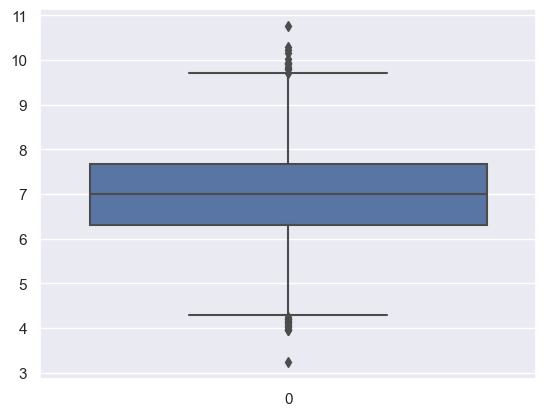

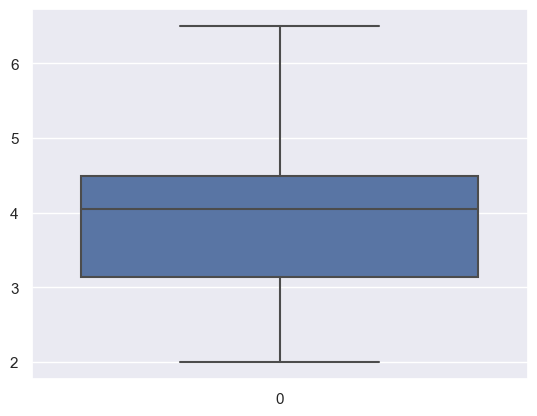

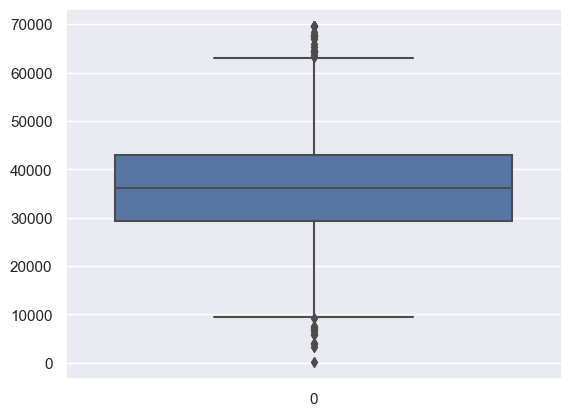

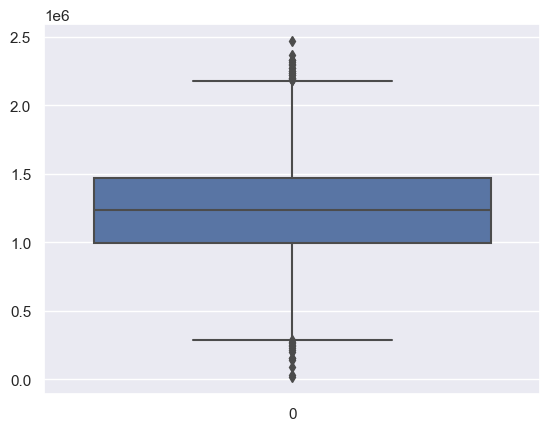

In [24]:
def boxplots(col):
    sns.boxplot(USAHousing[col])
    plt.show()
    
for i in list(USAHousing.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [25]:
# Since the Price is dependent variable it is never treated
# Outliers is present in - Avg. Area Income , Avg. Area House Age, Avg. Area Number of Rooms, Area Population  

In [27]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [26]:
# To treat the outliers, capping method shall be used
# Capping Method

In [28]:
# Create new dataframe
new_df = USAHousing.copy()

In [29]:
# Capping Method on Avg. Area Income

income_q1 = new_df['Avg. Area Income'].quantile(0.25)
income_q3 = new_df['Avg. Area Income'].quantile(0.75)
income_iqr = income_q3 - income_q1
income_upper = income_q3 + 1.5*income_iqr
income_lower = income_q1 - 1.5*income_iqr

In [30]:
new_df['Avg. Area Income'] = np.where(new_df['Avg. Area Income'] > income_upper, income_upper,
                                     np.where(new_df['Avg. Area Income'] < income_lower, income_lower,
                                             new_df['Avg. Area Income']))

In [32]:
# Capping Method on Avg. Area House Age

age_q1 = new_df['Avg. Area House Age'].quantile(0.25)
age_q3 = new_df['Avg. Area House Age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_upper = age_q3 + 1.5*age_iqr
age_lower = age_q1 - 1.5*age_iqr

In [33]:
new_df['Avg. Area House Age'] = np.where(new_df['Avg. Area House Age'] > age_upper, age_upper,
                                     np.where(new_df['Avg. Area House Age'] < age_lower, age_lower,
                                             new_df['Avg. Area House Age']))

In [34]:
# Capping Method on Avg. Area Number of Rooms

room_q1 = new_df['Avg. Area Number of Rooms'].quantile(0.25)
room_q3 = new_df['Avg. Area Number of Rooms'].quantile(0.75)
room_iqr = room_q3 - room_q1
room_upper = room_q3 + 1.5*room_iqr
room_lower = room_q1 - 1.5*room_iqr

In [35]:
new_df['Avg. Area Number of Rooms'] = np.where(new_df['Avg. Area Number of Rooms'] > room_upper, room_upper,
                                     np.where(new_df['Avg. Area Number of Rooms'] < room_lower, room_lower,
                                             new_df['Avg. Area Number of Rooms']))

In [36]:
# Capping Method on Area Population

pop_q1 = new_df['Area Population'].quantile(0.25)
pop_q3 = new_df['Area Population'].quantile(0.75)
pop_iqr = pop_q3 - pop_q1
pop_upper = pop_q3 + 1.5*pop_iqr
pop_lower = pop_q1 - 1.5*pop_iqr

In [37]:
new_df['Area Population'] = np.where(new_df['Area Population'] > pop_upper, pop_upper,
                                     np.where(new_df['Area Population'] < pop_lower, pop_lower,
                                             new_df['Area Population']))

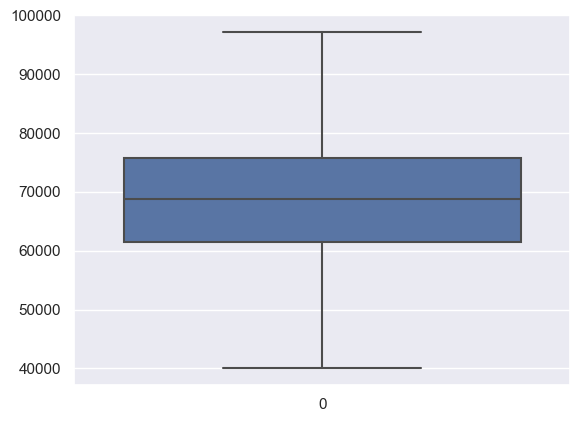

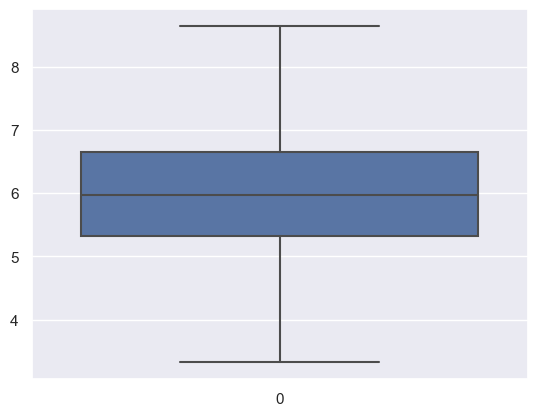

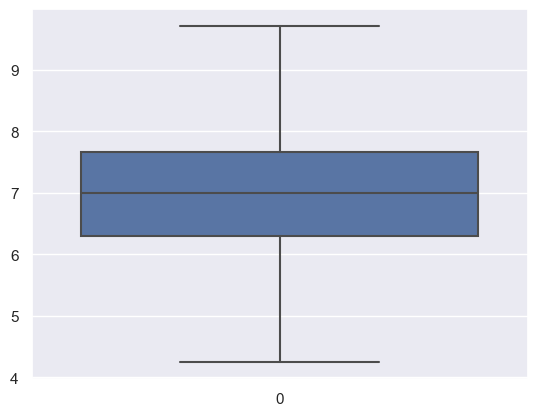

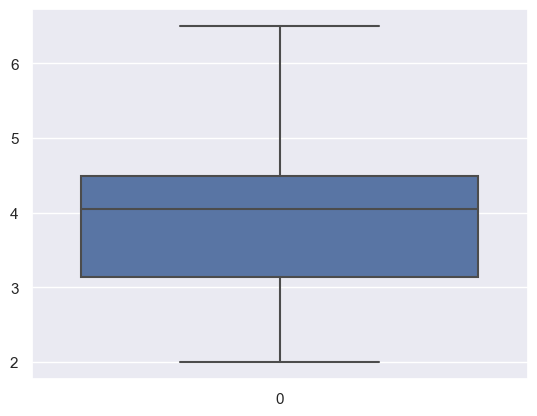

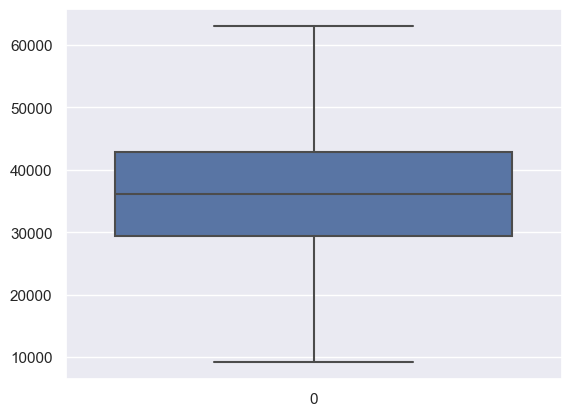

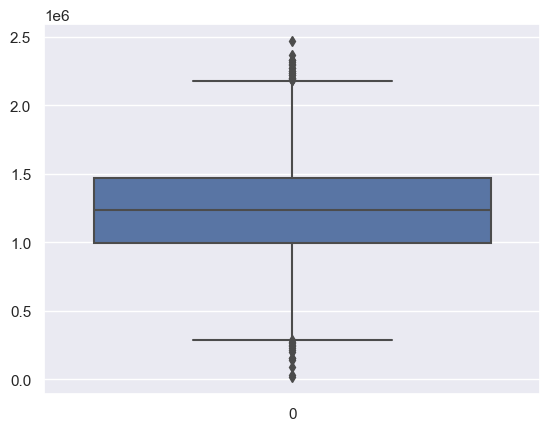

In [40]:
def boxplots(col):
    sns.boxplot(new_df[col])
    plt.show()
    
for i in list(new_df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)
    
# All the outliers are now treated with capping method

##### 4. Feature Scaling

- Feature scaling can be done only with independent varaible



In [43]:
# Price can be predicted by other variables, hence Price is dependent variable and others are independent variables
# Split the data into independent variable and dependent variable
# x - independent and y - dependent variable

In [44]:
new_df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915


In [45]:
x = new_df.iloc[:,0:-1]
y = new_df['Price']

In [46]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [47]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087648,-1.325622
1,1.008309,0.025747,-0.256381,-0.722966,0.407049
2,-0.690457,-0.113082,1.523179,0.930687,0.073326
3,-0.495800,1.226822,-1.398967,-0.585161,-0.187484
4,-0.813869,-0.949376,0.850726,0.201134,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423039,-1.350917
4996,0.936679,1.035210,-0.410236,0.030905,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501155,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181977,0.655755


In [51]:
# The above range should be between +3 to -3

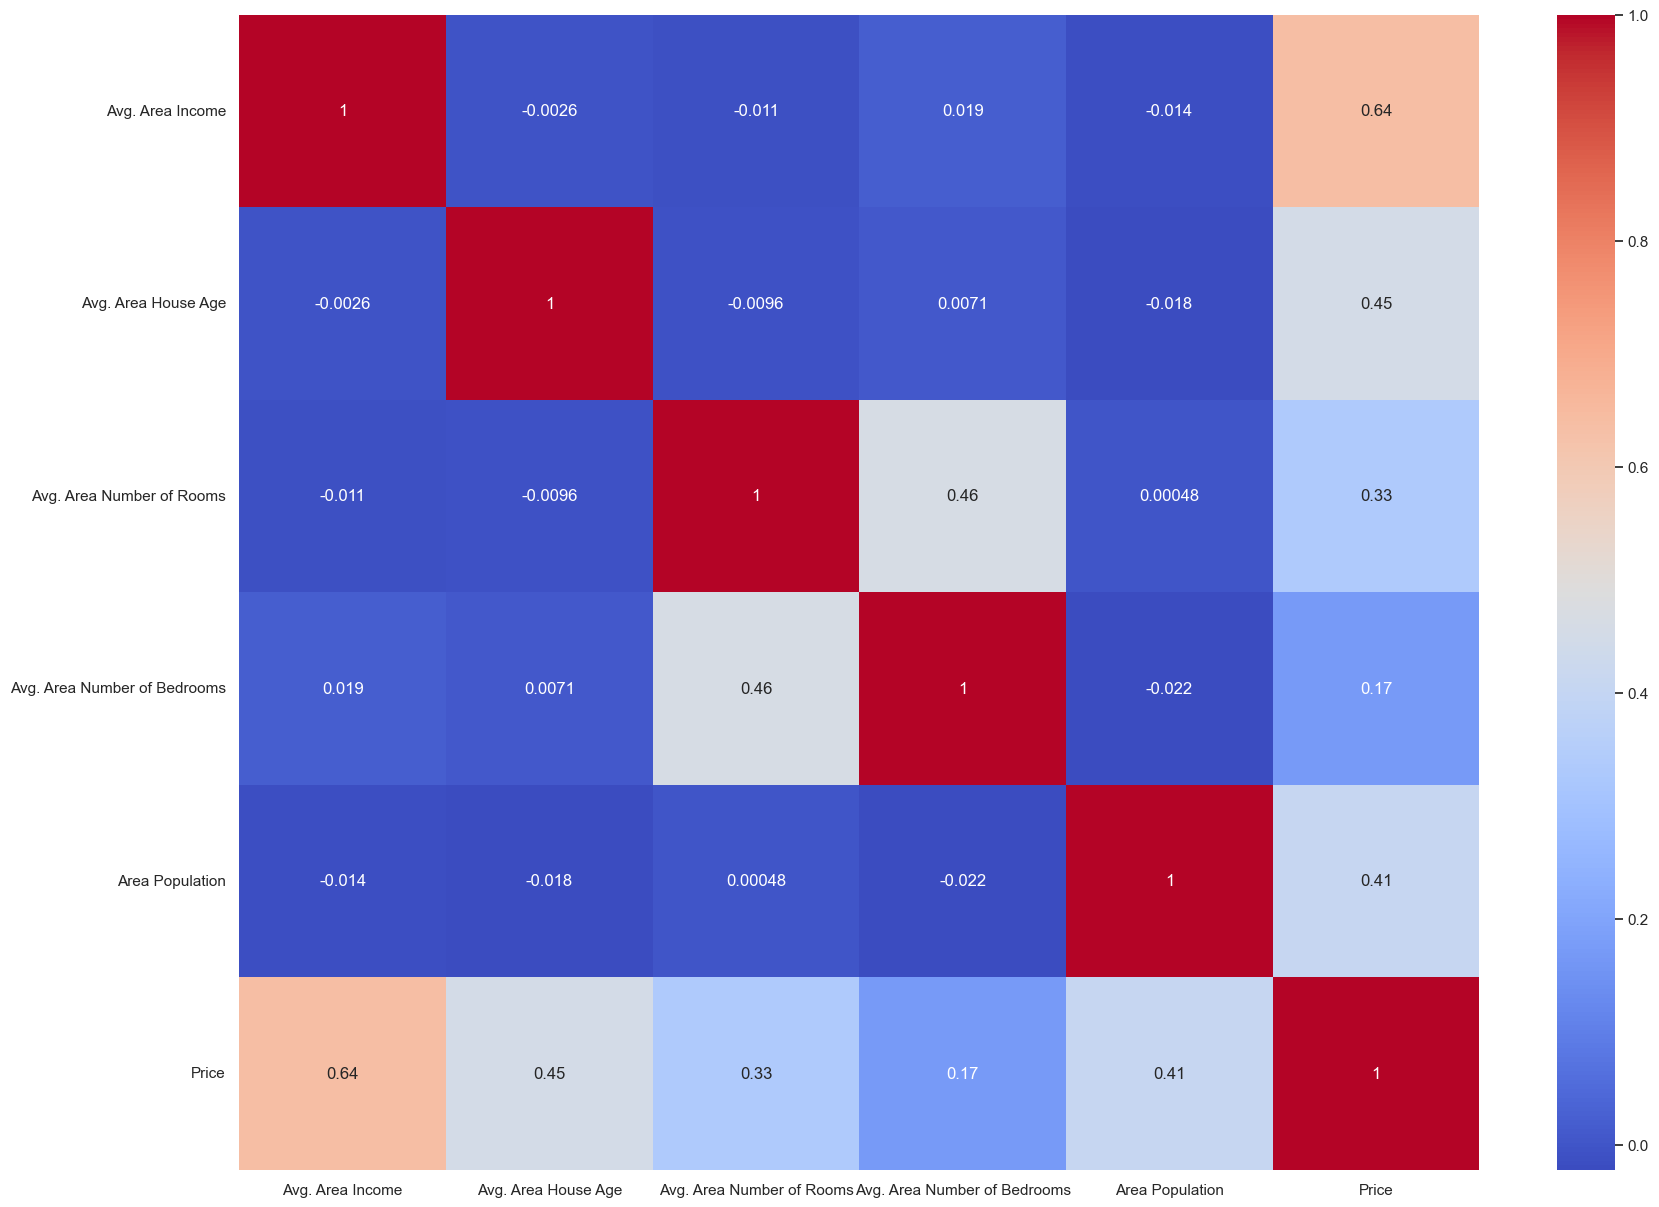

In [53]:
# Finding the correlation between variables

plt.figure(figsize=(20,15))
corr = new_df.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

In [55]:
# Check the correlation of Price with other variables
# If the value is more than 0.75 / 0.8 then the variable shall be dropped as it is highly correlated / multi collinear
# If the values of 2 variables are exactly same then anyone variable of choice shall be dropped as it will be multicolinear
# E.g. if the value of Avg. Are Income and Area Population is 0.41 then any one variable shall be dropped

# Note - Multicolinearity problem shall be checked only for multi linear regression problem and not simple linear regression

In [56]:
# Mulit-collinearity can be verified by Variance Inflation Factor [VIF]

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
variable = sc_x 

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

# i in range is used for iterating through each column

vif['Features'] = x.columns

In [64]:
variable.shape

(5000, 5)

In [65]:
variable.shape[1]

5

In [67]:
vif

,Variance Inflation Factor,Features
0,1.001066,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274838,Avg. Area Number of Rooms
3,1.275700,Avg. Area Number of Bedrooms
4,1.001142,Area Population


In [78]:
variance_inflation_factor(variable,1) # 1 is index no.

1.0005928706315006

In [79]:
variance_inflation_factor(variable,2) # 2 is index no.

1.2748383227427897

In [69]:
# Since VIF of all the Features is below 5, there is no problem of multi-collinearity

- A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.

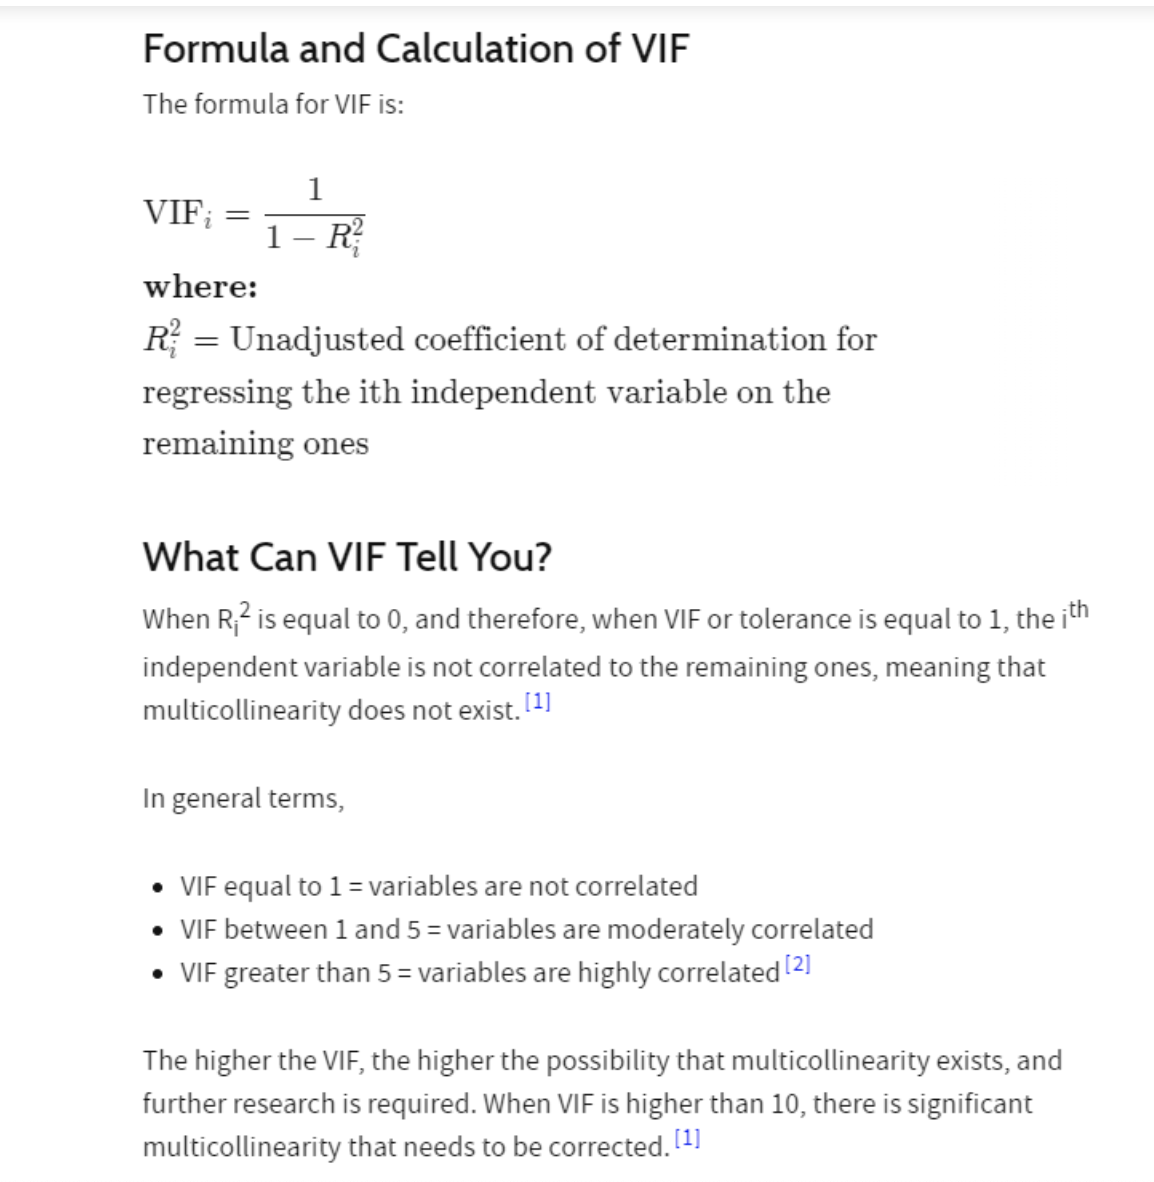

##### 5. Imbalance Treatment (Applicable only for Classification Problem)

In [82]:
# Imbalance Treatment is not applicable for regression problem

### B. Split the Data into training and testing

In [83]:
# Split the data into training - for building the model and test - for prediction 

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)
#test_size=0.25 means split the data into 75-25%
#random_state=101 means to fix the data i.e. data should not change everytime the code is executed

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3750, 5) (1250, 5) (3750,) (1250,)


In [87]:
# Here, x_train and y_train shall be used to build the model
# and, x_test shall be used for predicting the y and validating with y_test 

### C. Building the Linear Regression Model

##### Approach No. 1 - Sklearn Method

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.fit(x_train,y_train)

LinearRegression()

###### Prediction using Manual Approach

In [92]:
print(lm.intercept_)

#Prints intercept value (c in y=mx+c)

-2657920.6719473638


In [94]:
print(lm.coef_)

# 5 slope values for each variable

[2.17329521e+01 1.65689998e+05 1.21585113e+05 1.72972862e+03
 1.53020383e+01]


In [95]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [ ]:
## y = mx + c

#price = intercept + slope1*Avg. Area Income + slope2*Avg. Area House Age + slope3*Avg. Area Number of Rooms + 
#            slope4*Avg. Area Number of Bedrooms + slope5*Area Population

#price = -2657920.6719473638 + 2.17329521e+01*Avg. Area Income + 1.65689998e+05*Avg. Area House Age + 1.21585113e+05*Avg. Area Number of Rooms + 
#            1.72972862e+03*Avg. Area Number of Bedrooms + 1.53020383e+01*Area Population


In [98]:
# If Avg. Area Income = 85000, Avg. Area House Age = 2, Avg. Area Number of Rooms = 3
# Avg. Area Number of Bedrooms = 3 and Area Population = 38000 then calculate price

price = -2657920.6719473638 + 2.17329521e+01*85000 + 1.65689998e+05*2 + 1.21585113e+05*3 + 1.72972862e+03*3 + 1.53020383e+01*38000

In [99]:
price

472182.23281263607

##### Prediction using lm model with test dataset

In [107]:
y_pred_price = lm.predict(x_test) # For test dataset
y_pred_price_train = lm.predict(x_train) # For train dataset

In [101]:
y_pred_price

# This data is predicted using given test data (x)

array([1258771.45427271,  821517.21510497, 1743518.71330112, ...,
       1117246.1255402 ,  718625.71886068, 1518230.71307355])

In [102]:
y_test

# This is the actual data (x) given against the y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1881    1.727211e+06
2800    1.707270e+06
1216    1.167450e+06
1648    7.241217e+05
3063    1.561234e+06
Name: Price, Length: 1250, dtype: float64

In [ ]:
# Now validate the actual price of the test data and predicted price

In [103]:
from sklearn.metrics import r2_score

In [108]:
r2_score(y_test, y_pred_price)

0.9136249606984151

In [109]:
# This means the model is predicting 91.3% accurately for the test data

In [110]:
r2_score(y_train, y_pred_price_train)

0.9165095446547409

In [111]:
# This means the model is predicting 91.6% accurately for the training data

In [112]:
# Difference between accuracy of train and test data is not more than 10%
# Also, accuracy is more than 70% so there is no problem of overfitting or underfitting

##### Approach 2 - OLS Method (Most Recommended Method)

In [113]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [114]:
# Checking for endogenity problem
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()

# If by mistake other variable is selected as dependent variable then it is said to be endogenity problem
# Say Area population is wrongly selected as dependent variable then it is called enogenity problem

# endog means dependent variable and exog means independent variable

In [115]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.011e+04
Date:                Thu, 13 Jul 2023   Prob (F-statistic):                        0.00
Time:                        14:53:04   Log-Likelihood:                         -51812.
No. Observations:                3750   AIC:                                  1.036e+05
Df Residuals:                    3745   BIC:                                  1.037e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2091      0.314     32.560      0.000       9.594      10.824
Avg. Area House Age           4.916e+04   3478.628     14.131      0.000    4.23e+04     5.6e+04
Avg. Area Number of Rooms     -1.09e+04   3801.722     -2.868      0.004   -1.84e+04   -3450.477
Avg. Area Number of Bedrooms  5112.9468   3631.181      1.408      0.159   -2006.339    1.22e+04
Area Population                  8.5764      0.382     22.429      0.000       7.827       9.326
==============================================================================
Omnibus:                        0.212   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.258
Skew:                          -0.000   Prob(JB):                        0.879
Kurtosis:                       2.959   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Value of Adj. R-squared (uncentered): 0.964 means the accuracy is 96.4%
# All variables are statically important

In [122]:
# Here P-Value is given in P>|t| which should be less than 0.05
# In the above table all the values are below 0.05 except Avg. Area Number of Bedrooms
# Hence, Avg. Area Number of Bedrooms is non - significant variable and to reduce the complexity have to drop it and re-run the process

In [ ]:
# R-squared considers significant and non-significant variables
# Adj. R-squared considers only significant variables means here Avg. Area Number of Bedrooms was not considered
# R-squared is always greater than or equal to Adj. R-squared

In [116]:
# Checking for Auto-Correlation problem 
# It means there are errors in the self single variable, it will be more detailed in time series forecasting

In [ ]:
# Auto Correlation is checked using Durbin-Watson values
# Durbin-Watson values = 2 or near 2  - No Autocorrelation
# Durbin-Watson values < 2  - Positive Autocorrelation
# Durbin-Watson values > 2  - Negative Autocorrelation

# Generally considered values as per industry experience
# Durbin-Watson values 1.5 to 2.5  - No Autocorrelation
# Durbin-Watson values < 1.5  - Positive Autocorrelation
# Durbin-Watson values > 2.5  - Negative Autocorrelation

In [ ]:
# If there is problem of Auto-Correlation then the model shall be rejected and time series forcasting method is used
# In time series handle with
## 1. Lagged Variable 
## 2. Difference Variable
## 3. Generalised Least Squares

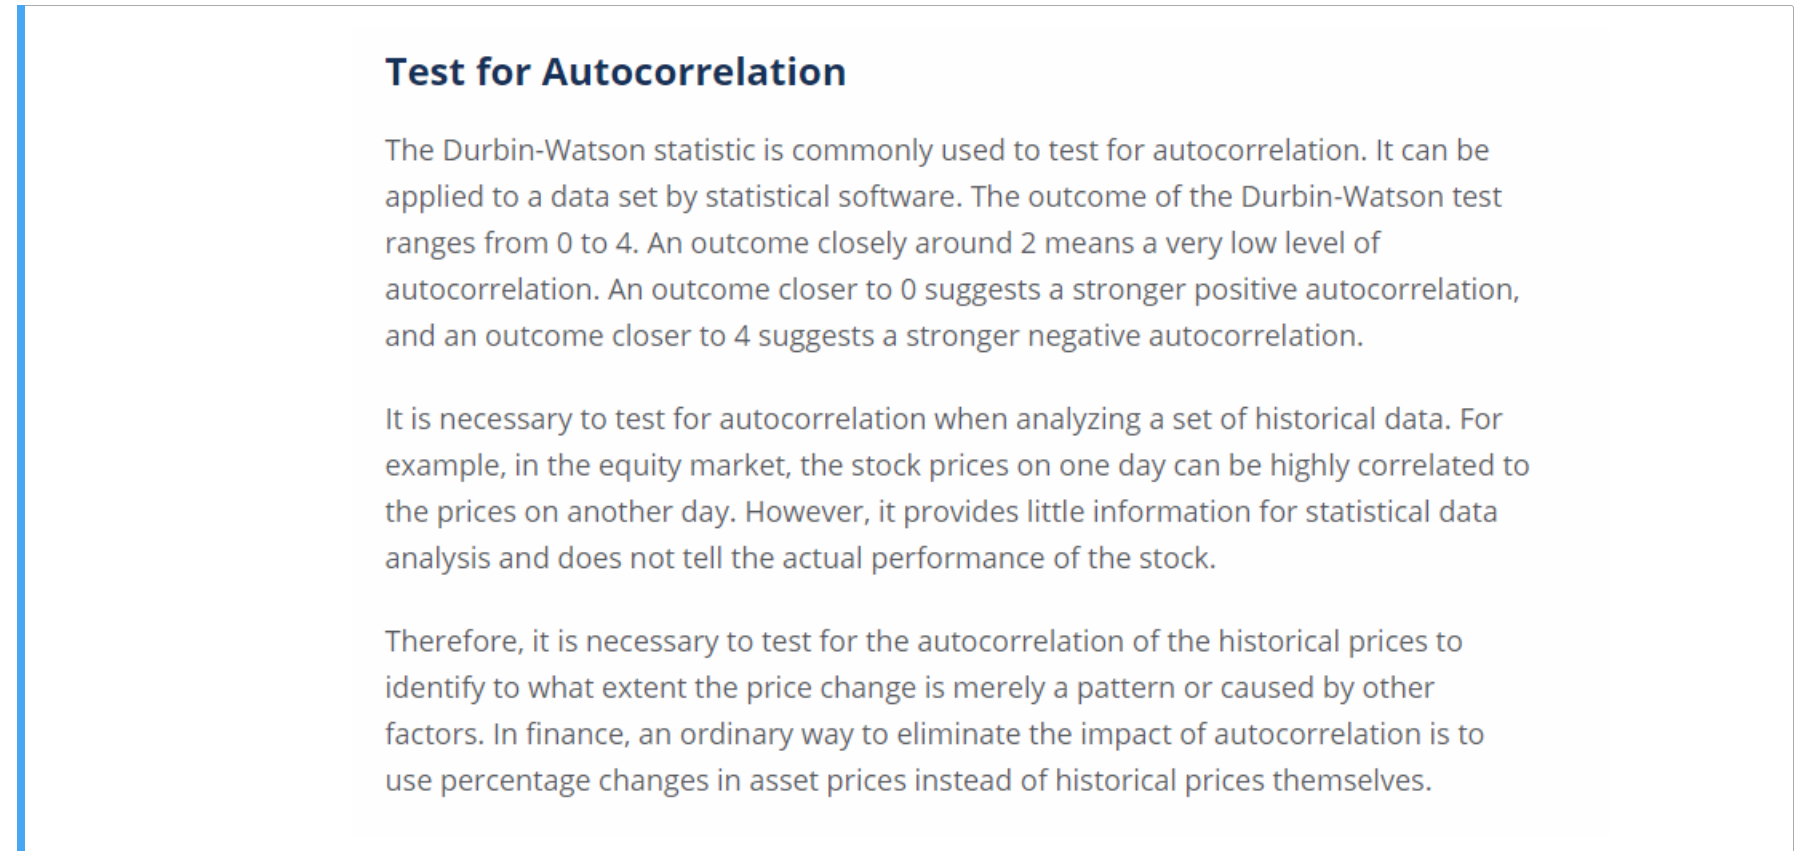

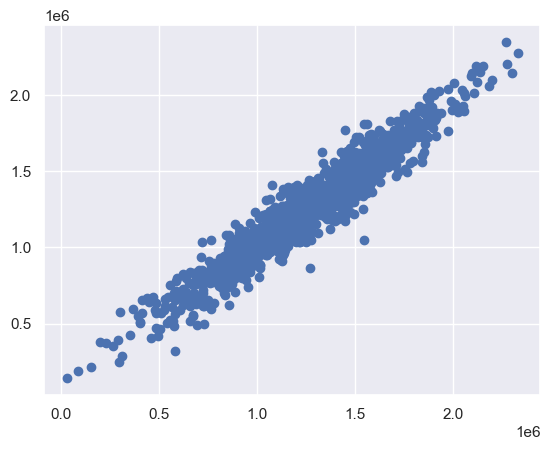

In [118]:
# Checking Linearity

plt.scatter(y_test,y_pred_price)

In [ ]:
# From the above graph it is clear the data is linear

In [ ]:
# Checking Normality of Residual
# Residual / Error = Actual - Predicted 
# Residual / Error = y_test - y_pred

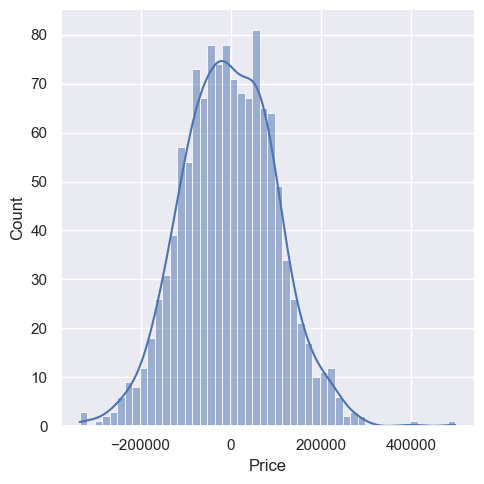

In [171]:
sns.displot(y_test - y_pred_price, bins=50, kde=True)
plt.show()

In [ ]:
# Checking for Homoscedacity 
# If the outliers are handled in the significant variables and data / residual is normally distributed,
# then the data is known as homoscedacity

In [ ]:
# Assumptions

# 1) Linearity - Satisfied
# 2) Normality of Residuals- Satisfied
# 3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed)
# 4) No autocorrelation - Satisfied
# 5) No or little Multicollinearity - satisfied
# 6) No endogenity problem - satisfied 

##### By using sklearn linear model
- training accuracy : 91.6%
- test accuracy : 91.3%


##### Accuracy after Regularization Method

In [124]:
# Lasso Regularization

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print('Lasso Model :', (lasso.coef_))

Lasso Model : [2.17329520e+01 1.65689893e+05 1.21585030e+05 1.72969525e+03
 1.53020383e+01]


In [125]:
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [126]:
print('Training Accuracy :', r2_score(y_train, y_pred_train_lasso))
print()
print('Test Accuracy :', r2_score(y_test, y_pred_test_lasso))

Training Accuracy : 0.9165095446545629

Test Accuracy : 0.9136249597519454


In [131]:
# Ridge Regularization

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print('Ridge Model :', (ridge.coef_))

Ridge Model : [2.17329218e+01 1.65675777e+05 1.21572318e+05 1.73465907e+03
 1.53020619e+01]


In [132]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [133]:
print('Training Accuracy :', r2_score(y_train, y_pred_train_ridge))
print()
print('Test Accuracy :', r2_score(y_test, y_pred_test_ridge))

Training Accuracy : 0.9165095421471023

Test Accuracy : 0.9136246343644583


In [140]:
# ElasticNet Regularization (This method is never used)

from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)

In [141]:
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [142]:
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)

In [143]:
print('Training Accuracy :', r2_score(y_train, y_pred_train_elastic))
print()
print('Test Accuracy :', r2_score(y_test, y_pred_test_elastic))

Training Accuracy : 0.9003403586761606

Test Accuracy : 0.8948434956389549


### D. Performance Matrix

##### Mean Absolute Error (MAE)

In [145]:
from sklearn import metrics

In [146]:
print('MAE :', metrics.mean_absolute_error(y_test, y_pred_price))

MAE : 83116.43312840589


In [147]:
# Generally threshhold MAE value is given by the client or by the host in hackathon

##### Mean Absolute Percent Error (MAPE)

In [155]:
print('MAPE :', metrics.mean_absolute_error(y_test, y_pred_price)/100)

MAPE : 831.1643312840589


##### Mean Square Error (MSE)

In [156]:
print('MSE :', metrics.mean_squared_error(y_test, y_pred_price))

MSE : 10794366921.882757


##### Root Mean Squared Error (RMSE)

In [157]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_price)))

RMSE : 103895.94275948776


#### Gradient Descent

In [165]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3750, 5) (1250, 5) (3750,) (1250,)


In [166]:
from sklearn.linear_model import SGDRegressor

In [167]:
gd_model = SGDRegressor()
gd_model.fit(x_train,y_train)

SGDRegressor()

In [169]:
y_pred_gd_train = gd_model.predict(x_train)

y_pred_gd_test = gd_model.predict(x_test)

In [170]:
print("GD Training Accuracy :", r2_score(y_train, y_pred_gd_train))
print()
print("GD Test Accuracy :", r2_score(y_test, y_pred_gd_test))

GD Training Accuracy : 0.9164802286422855

GD Test Accuracy : 0.9136447190211082
